In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
% matplotlib inline
% load_ext autoreload
% autoreload 2
print("loaded")

import os
dirpath = os.getcwd()
print("current directory is: ", dirpath)

C:\Users\adzie\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


loaded
current directory is:  C:\Users\adzie\code\time-series-machine-leaning


In [4]:
tf.__version__

'1.9.0'

In [5]:
from modules.spectral_pool_test import max_pool
from modules.spectral_pool import spectral_pool
from modules.frequency_dropout import test_frequency_dropout
from modules.create_images import open_image, downscale_image

current directory is:  C:\Users\adzie\code\time-series-machine-leaning


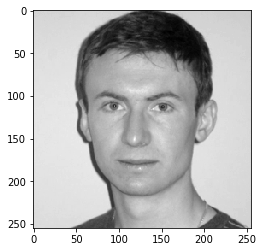

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

print("current directory is: ", os.getcwd())
fname = './Images/adam_spectral_pooling.jpg'
# L: convert to 8-bit pixels, black and white
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray')
plt.show()

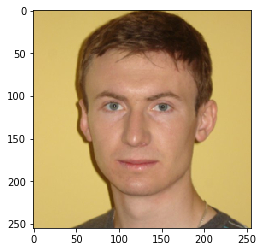

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

fname = 'Images/adam_spectral_pooling.jpg'
image = Image.open(fname).convert("RGB")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray')
plt.show()

show the grayscale image:


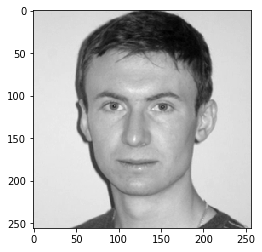

In [23]:
# image = open_image('aj.jpg')
# image = open_image('adam_spectral_pooling.jpg')
fname = './Images/adam_spectral_pooling.jpg'
image = Image.open(fname).convert("L")
grayscale_image = np.asarray(downscale_image(
    image, 256, 256).convert('F')) / 255.
print("show the grayscale image:")
plt.imshow(grayscale_image, cmap='gray')

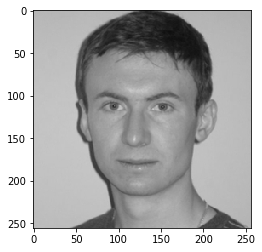

In [19]:
fname = './Images/adam_spectral_pooling.jpg'
image = Image.open(fname).convert("L")
image = downscale_image(image, 256, 256).convert('RGB')
image = np.asarray(image) / 255.
# original image
plt.imshow(image, cmap='gray')

In [10]:
def get_fft_plot(fft, shift_channel=True, eps=1e-12, pad_to_width=256):
    """ Convert a fourier transform returned from tensorflow in a format
    that can be plotted.
    Args:
        fft: numpy array with image and channels
        shift_channel: if True, the channels are assumed as first dimension and
                       will be moved to the end.
        eps: to be added before taking log
    """
    if shift_channel:
        fft = np.squeeze(np.moveaxis(np.absolute(fft), 0, -1))
    fft = np.log(fft + eps)
    mn = np.min(fft, axis=(0, 1))
    mx = np.max(fft, axis=(0, 1))
    fft = (fft - mn) / (mx - mn)
    
    fft_shifted = np.fft.fftshift(fft)
    padding = int((pad_to_width - fft_shifted.shape[1]) / 2)
    if padding < 0:
        padding = 0
    return np.pad(
        fft_shifted, 
        pad_width=padding,
        mode='constant',
        constant_values=1.,
    )


### Create Grid grayscale:

show the grayscale image:
grayscale_image shape: (256, 256)


test_frequency_dropout image shape:  (1, 1, 256, 256)


test_frequency_dropout image shape:  (1, 1, 256, 256)


test_frequency_dropout image shape:  (1, 1, 256, 256)


test_frequency_dropout image shape:  (1, 1, 256, 256)


test_frequency_dropout image shape:  (1, 1, 256, 256)


test_frequency_dropout image shape:  (1, 1, 256, 256)


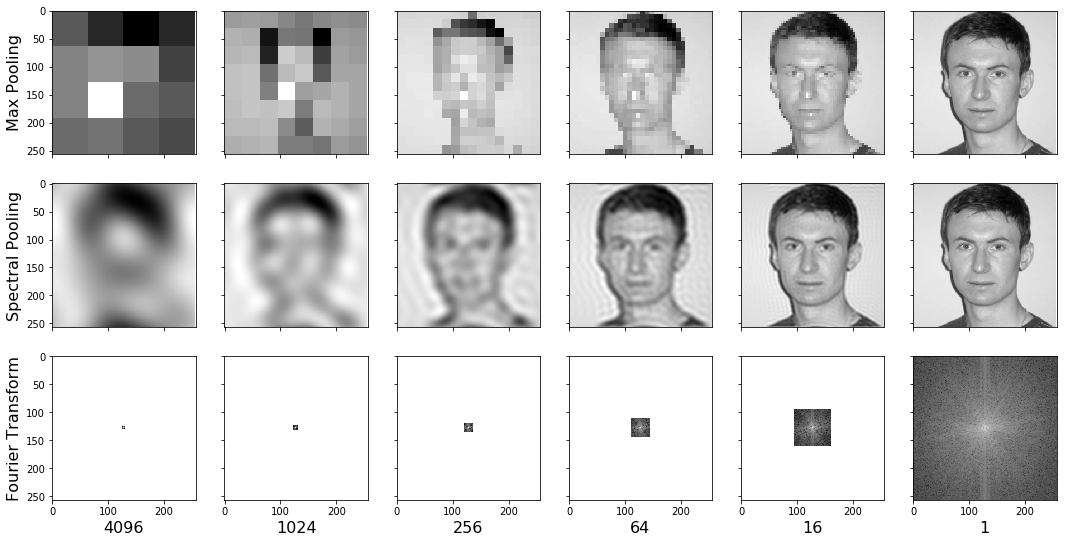

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(18, 9), 
                         sharex=True, sharey=True)
pool_size = [64, 32, 16, 8, 4, 1]

fname = './Images/adam_spectral_pooling.jpg'
image = Image.open(fname).convert("L")
image_scaled = downscale_image(image, 256, 256)
image_max_pool = np.asarray(image_scaled)
image = np.asarray(image_scaled.convert('F'))
grayscale_image = image / 255.
print("show the grayscale image:")
plt.imshow(grayscale_image, cmap='gray')

grayscale_images = np.expand_dims(
    np.expand_dims(grayscale_image, 0), 0
)
print("grayscale_image shape:", grayscale_image.shape)

for i in range(6):
    ax = axes[0, i]
    im_pool = max_pool(grayscale_image, 
                       pool_size=pool_size[i])
    im_pool = np.squeeze(im_pool)
    ax.imshow(im_pool, cmap='gray')
    if not i:
        ax.set_ylabel('Max Pooling', fontsize=16)

for i in range(6):
    ax = axes[1, i]
    ax2 = axes[2, i]
    cutoff_freq = int(256 / (pool_size[i] * 2))
    tf_cutoff_freq = tf.cast(tf.constant(cutoff_freq), 
                             tf.float32)
    im_pool = test_frequency_dropout(grayscale_images, 
                                     tf_cutoff_freq)[0]
    im_pool = np.clip(np.squeeze(im_pool), 0, 1)
    im_fft, _ = spectral_pool(
        grayscale_images,
        filter_size=(1 + 2 * cutoff_freq),
        return_transformed=True
    )
    ax.imshow(im_pool, cmap='gray')
    ax2.imshow(get_fft_plot(im_fft[0]), cmap='gray')
    ax2.set_xlabel(pool_size[i]**2, fontsize=16)
    if not i:
        ax.set_ylabel('Spectral Pooling', fontsize=16)
        ax2.set_ylabel('Fourier Transform', fontsize=16)
fig.savefig(
    'Images/Figure2_Grayscale_Grid_Pooling-ryerson.png')

TypeError: unsupported operand type(s) for *: 'Image' and 'int'

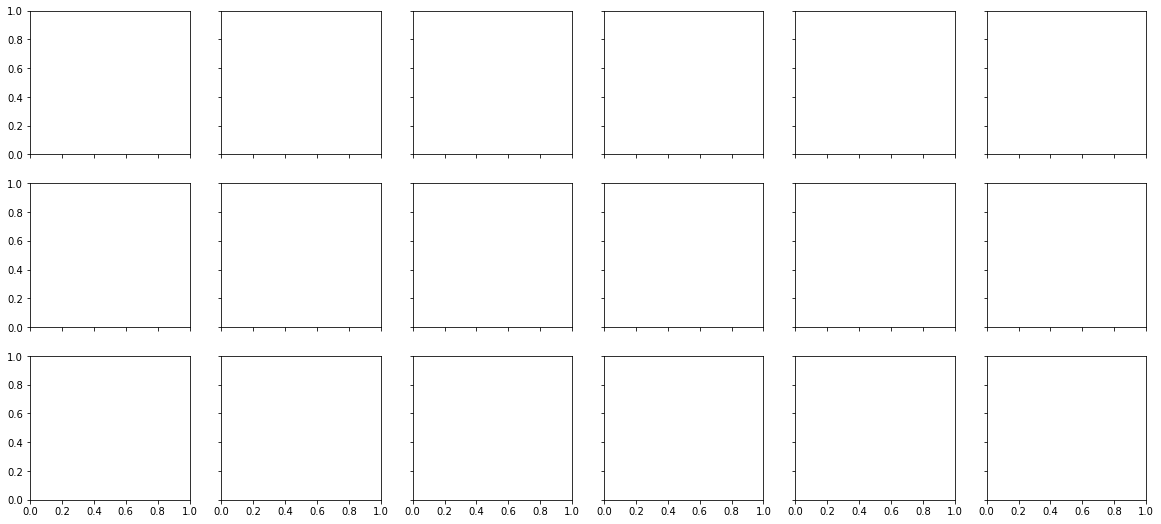

In [22]:
fig, axes = plt.subplots(3, 6, figsize=(20, 9), 
                         sharex=True, sharey=True)
pool_size = [64, 32, 16, 8, 4, 1]
grayscale_images = np.expand_dims(
    np.expand_dims(grayscale_image, 0), 0
)   

# max pool
for i in range(6):
    ax = axes[0, i]
    im_pool = max_pool(image, pool_size=pool_size[i])
    im_pool = np.squeeze(im_pool)
    ax.imshow(im_pool, cmap='gray')
    if not i:
        ax.set_ylabel('Max Pooling', fontsize=16)

# spectral pool
for i in range(6):
    ax = axes[1, i]
    ax2 = axes[2, i]
    cutoff_freq = int(256 / (pool_size[i] * 2))
    tf_cutoff_freq = tf.cast(tf.constant(cutoff_freq), tf.float32)
    im_pool = test_frequency_dropout(grayscale_images, tf_cutoff_freq)[0]
    im_pool = np.clip(np.squeeze(im_pool), 0, 1)
    im_fft, _ = spectral_pool(
        grayscale_images,
        filter_size=(1 + 2 * cutoff_freq),
        return_transformed=True
    )
    ax.imshow(im_pool, cmap='gray')
    ax2.imshow(get_fft_plot(im_fft[0]), cmap='gray')
    ax2.set_xlabel(pool_size[i]**2, fontsize=16)
    if not i:
        ax.set_ylabel('Spectral Pooling', fontsize=16)
        ax2.set_ylabel('Fourier Transform', fontsize=16)
fig.savefig('Images/Figure2_Grayscale_Grid_Pooling.png')

### Create Grid RGB:

cutoff_freq:  2
image shape:  (1, 3, 256, 256)
cutoff_freq:  4
image shape:  (1, 3, 256, 256)
cutoff_freq:  8
image shape:  (1, 3, 256, 256)
cutoff_freq:  16
image shape:  (1, 3, 256, 256)
cutoff_freq:  32
image shape:  (1, 3, 256, 256)
cutoff_freq:  128
image shape:  (1, 3, 256, 256)


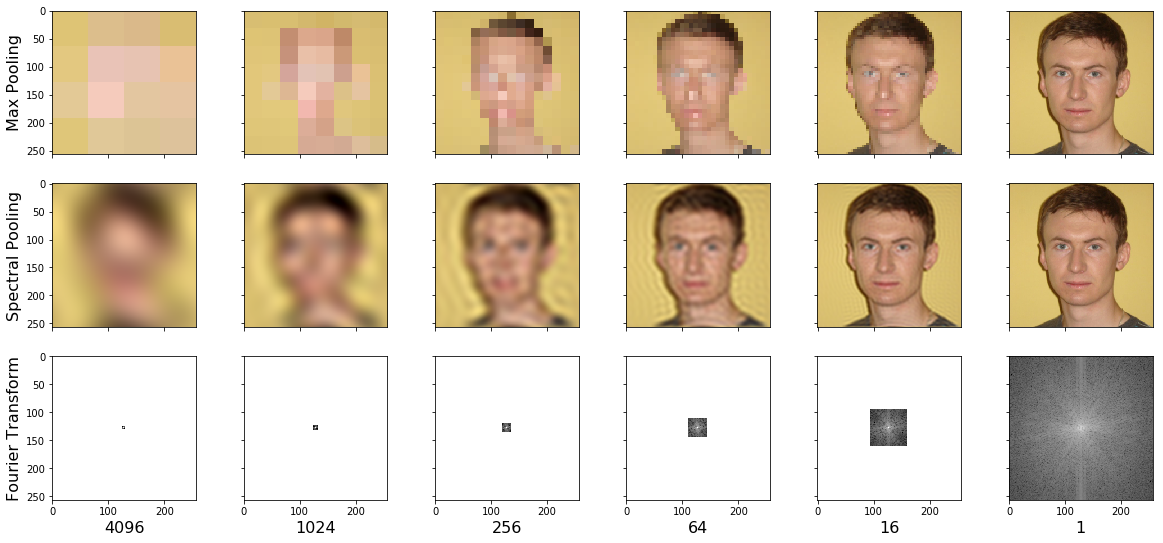

In [10]:
fig, axes = plt.subplots(3, 6, figsize=(20, 9), sharex=True, sharey=True)
pool_size = [64, 32, 16, 8, 4, 1]
# pool_size = [3]

for i in range(len(pool_size)):
    ax = axes[0, i]
    im_pool = max_pool(image, pool_size=pool_size[i], convert_grayscale=False)
    im_pool = np.squeeze(im_pool)
    ax.imshow(im_pool, cmap='gray')
    if not i:
        ax.set_ylabel('Max Pooling', fontsize=16)

for i in range(len(pool_size)):
    ax = axes[1, i]
    ax2 = axes[2, i]
    cutoff_freq = int(256 / (pool_size[i] * 2))
    print("cutoff_freq: ", cutoff_freq)
    tf_cutoff_freq = tf.cast(tf.constant(cutoff_freq), tf.float32)
    im_pool = test_frequency_dropout(
        np.expand_dims(np.moveaxis(image, -1, 0), 0),
        tf_cutoff_freq
    )[0]
    im_pool = np.clip(np.squeeze(im_pool), 0, 1)
    im_fft, _ = spectral_pool(
        grayscale_images,
        filter_size=(1 + 2 * cutoff_freq),
        return_transformed=True
    )
    ax.imshow(np.moveaxis(im_pool, 0, -1), cmap='gray')
    ax2.imshow(get_fft_plot(im_fft[0]), cmap='gray')
    ax2.set_xlabel(pool_size[i]**2, fontsize=16)
    if not i:
        ax.set_ylabel('Spectral Pooling', fontsize=16)
        ax2.set_ylabel('Fourier Transform', fontsize=16)
fig.savefig('../Images/Figure2_RGB_Grid_Pooling.png')

cutoff_freq:  2
tf_cutoff_freq:  Tensor("Cast_1:0", shape=(), dtype=float32)
image shape:  (1, 3, 256, 256)
cutoff_freq:  4
tf_cutoff_freq:  Tensor("Cast_1:0", shape=(), dtype=float32)
image shape:  (1, 3, 256, 256)
cutoff_freq:  8
tf_cutoff_freq:  Tensor("Cast_1:0", shape=(), dtype=float32)
image shape:  (1, 3, 256, 256)
cutoff_freq:  16
tf_cutoff_freq:  Tensor("Cast_1:0", shape=(), dtype=float32)
image shape:  (1, 3, 256, 256)
cutoff_freq:  32
tf_cutoff_freq:  Tensor("Cast_1:0", shape=(), dtype=float32)
image shape:  (1, 3, 256, 256)
cutoff_freq:  128
tf_cutoff_freq:  Tensor("Cast_1:0", shape=(), dtype=float32)
image shape:  (1, 3, 256, 256)


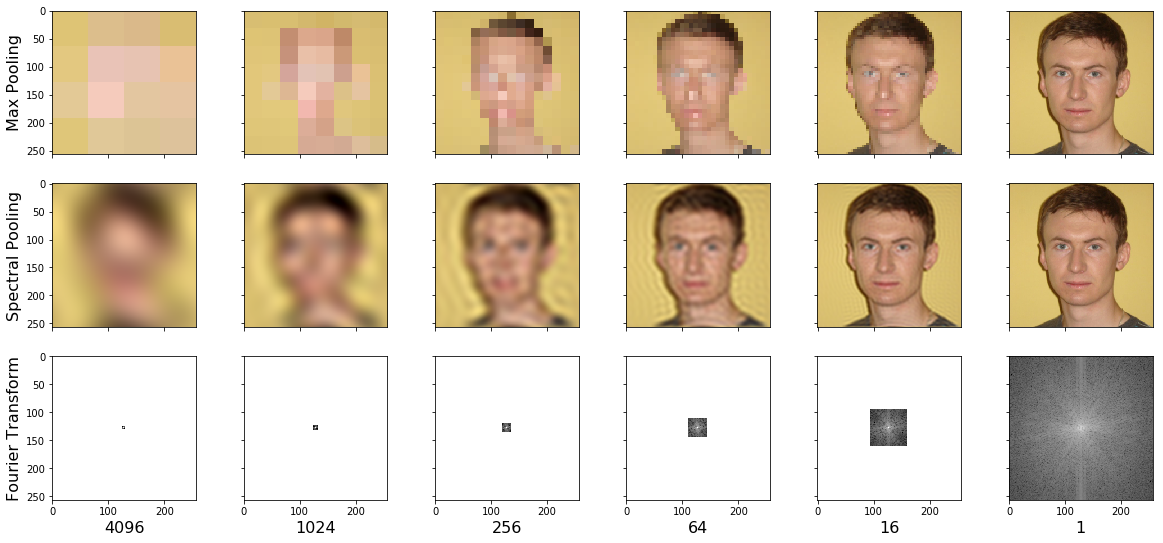

In [11]:
fig, axes = plt.subplots(3, 6, figsize=(20, 9), sharex=True, sharey=True)
pool_size = [64, 32, 16, 8, 4, 1]
# pool_size = [3]

for i in range(len(pool_size)):
    ax = axes[0, i]
    im_pool = max_pool(image, pool_size=pool_size[i], convert_grayscale=False)
    im_pool = np.squeeze(im_pool)
    ax.imshow(im_pool, cmap='gray')
    if not i:
        ax.set_ylabel('Max Pooling', fontsize=16)

for i in range(len(pool_size)):
    ax = axes[1, i]
    ax2 = axes[2, i]
    cutoff_freq = int(256 / (pool_size[i] * 2))
    print("cutoff_freq: ", cutoff_freq)
    tf_cutoff_freq = tf.cast(tf.constant(cutoff_freq), tf.float32)
    print("tf_cutoff_freq: ", tf_cutoff_freq)
    im_pool = test_frequency_dropout(
        np.expand_dims(np.moveaxis(image, -1, 0), 0),
        tf_cutoff_freq
    )[0]
    im_pool = np.clip(np.squeeze(im_pool), 0, 1)
    im_fft, _ = spectral_pool(
        grayscale_images,
        filter_size=(1 + 2 * cutoff_freq),
        return_transformed=True
    )
    ax.imshow(np.moveaxis(im_pool, 0, -1), cmap='gray')
    ax2.imshow(get_fft_plot(im_fft[0]), cmap='gray')
    ax2.set_xlabel(pool_size[i]**2, fontsize=16)
    if not i:
        ax.set_ylabel('Spectral Pooling', fontsize=16)
        ax2.set_ylabel('Fourier Transform', fontsize=16)
fig.savefig('../Images/Figure2_RGB_Grid_Pooling-modified.png')